# DAND PROJECT 1: INVESTIGATE A DATASET
## TITANIC MAIDEN VOYAGE

In April 1912, the events of the RMS Titanic passed. It lives in infamy due to the sheer scale of the ship itself, the arrogance of the ship's architects, and the deaths that resulted.

This report will analyze and present the data associated with the passengers on board the Titanic, and attempt to answer the following question: **What factors may have contributed to a passenger's survival aboard the RSM Titanic?**

### DATASET

Firstly, the various Python libraries which will assist in the analysis are imported. The data we are using is already gathered for us, in the form of a CSV file aptly named 'titanic_data.csv', which is then read and saved in a variable named `ti_data`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from IPython.display import display
import re

%matplotlib inline

ti_data = pd.read_csv('titanic-data.csv')

/Users/leoshen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Let's now preview the columns that the dataframe is divided into, by calling the `.head()` function.

In [2]:
display(ti_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Each row lists one passenger. There are numerous columns with information pertaining to each passenger. Descriptions for each column available at https://www.kaggle.com/c/titanic/data.

For each variable, we will briefly describe its contents, and (if necessary) see whether the variable affects a passenger's survival.

# `PassengerId`
We can see from the above table that `PassengerId` only numbers each passenger, with 891 total values for 891 passengers. As the numbers do not describe the passengers in any way, this variable will not be explored further.

# `Survived` 
### The variable `Survived` describes whether a passenger aboard the Titanic survived (1) or perished (0). It is *directly central* to our primary question of the outcome of passengers.

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Mean Survival Rate:  0.383838383838
Standard Deviation:  0.486592454265


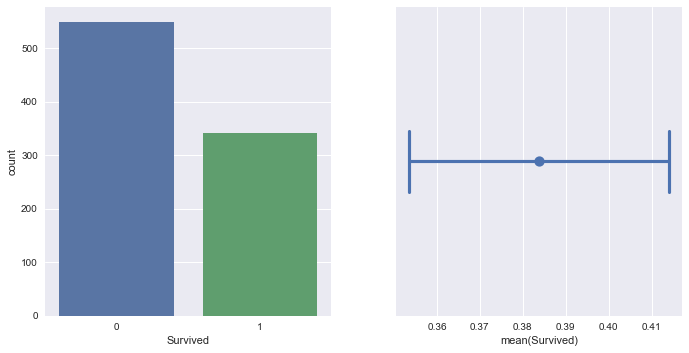

In [3]:
fig, ax = plt.subplots(1,2)
plt.tight_layout()
sns.countplot(x='Survived', data=ti_data, ax=ax[0]).figure.set_size_inches(10, 5)
sns.pointplot(x=ti_data['Survived'], capsize=0.2, ax=ax[1]).figure.set_size_inches(10, 5)

display(ti_data.groupby('Survived')['PassengerId'].count())
print "Mean Survival Rate: ", ti_data['Survived'].mean()
print "Standard Deviation: ", ti_data['Survived'].std()

The `Survived` column shows that 549 passengers perished, while 342 survived. This gives a 38% chance of survival for **any passenger**. So...

### What factors (if any) influenced a passenger's 38% chance of survival aboard the Titanic?

Two functions will be now defined, in order to easily bring up relevant statistics and plots grouping data by both `Survived` and the variable in question.

In [4]:
def surv_rate(var):
    data_by_VarSurv = ti_data.groupby([var, 'Survived'])['PassengerId'].count().unstack('Survived')
    data_by_VarSurv.columns = ['Perished', 'Survived']
    data_by_VarSurv['Total Passenger Count'] = ti_data.groupby([var])['Survived'].count()
    data_by_VarSurv['Mean Survival Rate'] = ti_data.groupby([var])['Survived'].mean()
    data_by_VarSurv['Standard Deviation'] = ti_data.groupby([var])['Survived'].std()
    return data_by_VarSurv.reset_index().sort_values(by='Mean Survival Rate', ascending=0)

In [5]:
def surv_rate_chart(var):
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    sns.countplot(x=var, data=ti_data, ax=ax[0]).figure.set_size_inches(10, 5)
    sns.pointplot(y='Survived', x=var, data=ti_data, ax=ax[1], capsize=0.2).figure.set_size_inches(10, 5)

# `Pclass`
The variable `Pclass` describes the class level of a passenger. This variable could certainly be related to a passenger's survival; perhaps people with more expensive tickets were given priority.

In [6]:
surv_rate('Pclass')

,Pclass,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
0,1,80,136,216,0.629630,0.484026
1,2,97,87,184,0.472826,0.500623
2,3,372,119,491,0.242363,0.428949


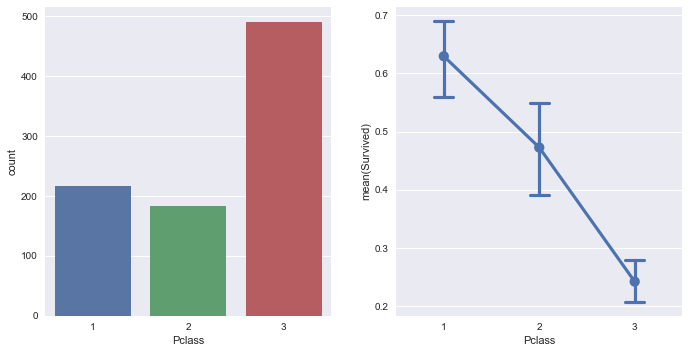

In [7]:
surv_rate_chart('Pclass')

Here, we can see that there were 216 Class 1 passengers, 184 Class 2 passengers, and 491 Class 3 passengers.

Looking at the mean (where 1 = survived, and 0 = perished), we can see the following rates of survival:
- Class 1: 62.96%
- Class 2: 47.28%
- Class 3: 24.23%

The standard rate of survival was 38%. **Only Class 3 passengers had a rate below the standard**.

### Conclusion: The lower the passenger class, the lower the survival rate. 

# `Sex`
The `Sex` variable is **probably relevant** to survival, due to the 'women and children first' protocol.

In [8]:
surv_rate('Sex')

,Sex,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
0,female,81,233,314,0.742038,0.438211
1,male,468,109,577,0.188908,0.391775


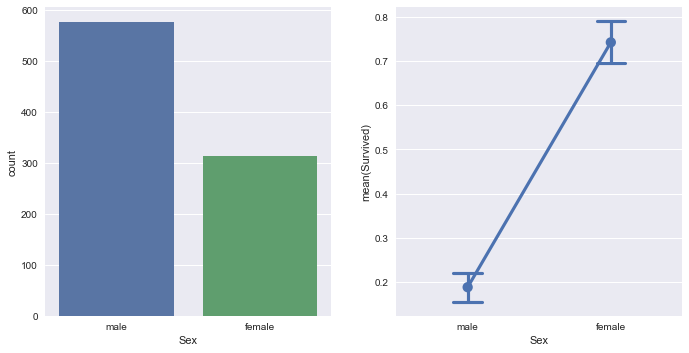

In [9]:
surv_rate_chart('Sex')

Here, we can see:
- 314 female passengers with a 74.20% mean survival rate
- 577 male passengers with a 18.89% mean survival rate 

Females, despite lower numbers, had an overwhelmingly higher survival rate than men.

### **Conclusion: females aboard the Titanic had a *significantly* higher chance of survival.**

# `Age`
`Age` lists a passenger's age.

This variable is **probably relevant** to survival. The safety of a passenger could easily be prioritized due to their age.

In [10]:
ti_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The above data reveals a problems with the `Age` column.

Firstly, there are 714 numbers, but 891 passengers.
This means there are 177 passengers with `NaN` as their age, which means this data is not available. There are a few things we could do with this situation:
1. Discard these entries completely, leaving 714 datapoints only
    - This technically gives the most accurate result, as they are all original datasets
2. Replace these entries with the mean age of all passengers
    - This may potentially introduce bias to the result, as there is no guarantee that the NaN-aged passengers were all 29.69 years old
3. Replace these entries with the mean ages of passengers grouped by their title.
    - Finding the mean ages of passengers grouped by their titles may give us a more accurate representation of age. For example, the title "Master" very commonly referred to young boys in the early 20th Century, so it was very likely that they were **not** the same age as someone titled 'Mr'.
    
All datasets for these 3 options will now be prepared.

In [11]:
# Option 1 Step 1 - Create new dataframe without NaN-aged passengers
ti_data_nonan = ti_data[ti_data['Age'].notnull()]


# Option 2 Step 1 - Create copy of Age column in original dataframe
ti_data['NewAgeMean'] = ti_data['Age']
# Option 2 Step 2 - Replace NaN values with passenger's mean age
ti_data['NewAgeMean'].fillna(ti_data.mean()['Age'], inplace=True)


# Option 3 Step 1 - Create function to split Title from name, removing surname via comma and title via period
def extract_title(Name):
    title = (Name.split(',')[1].split('.')[0].strip())
    return title
# Option 3 Step 2 - Append title to new column in dataframe
ti_data[['Title']] = pd.DataFrame({'Title':ti_data['Name'].apply(extract_title)})
# Option 3 Step 3 - Make copy of current Age column
ti_data['NewAgeTitle'] = ti_data['Age']
# Option 3 Step 4 - Replace NaN values with passenger's mean age grouped by Title
ti_data['NewAgeTitle'].fillna(ti_data.groupby("Title")['Age'].transform("mean"), inplace=True)

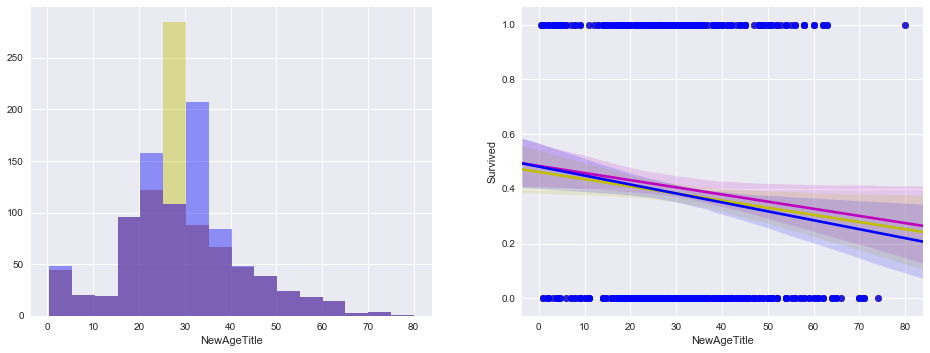

In [12]:
fig, ax = plt.subplots(1,2)
plt.tight_layout()
sns.distplot(a=ti_data_nonan['Age'], kde=False, bins=16, ax=ax[0], color='m').figure.set_size_inches(14, 5)
sns.regplot(x="Age", y="Survived", data=ti_data_nonan, ax=ax[1], color='m').figure.set_size_inches(14, 5)    
sns.distplot(a=ti_data['NewAgeMean'], kde=False, bins=16, ax=ax[0], color='y').figure.set_size_inches(14, 5)
sns.regplot(x="NewAgeMean", y="Survived", data=ti_data, ax=ax[1], color='y').figure.set_size_inches(14, 5)    
sns.distplot(a=ti_data['NewAgeTitle'], kde=False, bins=16, ax=ax[0], color='b').figure.set_size_inches(14, 5)
sns.regplot(x="NewAgeTitle", y="Survived", data=ti_data, ax=ax[1],  color='b').figure.set_size_inches(14, 5)

In [13]:
print "Option 1 Mean:", ti_data_nonan['Age'].mean()
print "Option 1 Standard Deviation:", ti_data_nonan['Age'].std()
print "\nOption 2 Mean:", ti_data['NewAgeMean'].mean()
print "Option 2 Standard Deviation:", ti_data['NewAgeMean'].std()
print "\nOption 3 Mean:", ti_data['NewAgeTitle'].mean()
print "Option 3 Standard Deviation:", ti_data['NewAgeTitle'].std()

Option 1 Mean: 29.6991176471
Option 1 Standard Deviation: 14.5264973323

Option 2 Mean: 29.6991176471
Option 2 Standard Deviation: 13.002015226

Option 3 Mean: 29.7546587685
Option 3 Standard Deviation: 13.2771789985


Now all 3 dataset options are available. They are plotted on the histogram and scatterplot with the following colors:

Option 1 (NaN ignored): **Magenta**
    - Option 1 histogram peaks between the ages of 20-30. It naturally has the lowest number of data points
    - Option 1 regression line is the **most shallow**.

Option 2 (Mean grouped by All replaced): **Yellow**
    - Option 2 histogram (in yellow) a notable peak at age 30, presumably due to the influx of NaN-aged passengers suddenly becoming 29.69 years old.
    - Option 2 regression line is **slightly steeper** than Option 1.

Option 3 (Mean grouped by Titles replaced): **Blue**
    - Option 3 histogram has additional data falling mostly in the 30-40 year old bins, but also some in the 20s and a few in the 0-5 age.
    - Option 3 regression line has the **steepest gradient**.
   
Out of all 3 data options to choose, which would be best?

I would pick #3.

I believe finding the mean ages of passengers grouped by titles provides the most accurate representation of age. For example, the title "Master" very commonly referred to young boys in the early 20th Century, so it was very likely that they were **not** the same age as someone titled 'Mr'. Similarly, prestigious titles such as Sir or Colonel would most likely belong to older gentlemen, due to the many years of experience needed in order to earn such an honor.

Regardless of the dataset chosen, all three of them are quite similar. They each have similar means and standard deviations (though SD of Option 2 is lower due to higher amount of passengers being aged exactly 29.69), and present a declining regression line (albeit a weak one), which implies a **negative relationship between a passenger's age and their chance of survival**.

To present the `Age` data categorically, we can also group passengers together in larger sets order to see clear data linking age to survival aboard the Titanic. This will be done using `pd.cut` to bin by age.

In [14]:
# create bin list of age cut-offs
bins = [0, 5, 10, 20, 40, 60, 100]
# create list of age group names
age_names = ['Baby', 'Child', 'Teen', 'Adult', 'Senior', 'Elderly']
# divide passengers by age groups and label them
cut_age = pd.cut(ti_data['NewAgeTitle'], bins, labels=age_names)
#add binned age groups to dataframe
ti_data['AgeGroup'] = cut_age

In [15]:
surv_rate('AgeGroup')

,AgeGroup,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
0,Baby,15,33,48,0.687500,0.468417
4,Senior,79,50,129,0.387597,0.489101
2,Teen,71,44,115,0.382609,0.488151
3,Adult,354,203,557,0.364452,0.481709
1,Child,13,7,20,0.350000,0.489360
5,Elderly,17,5,22,0.227273,0.428932


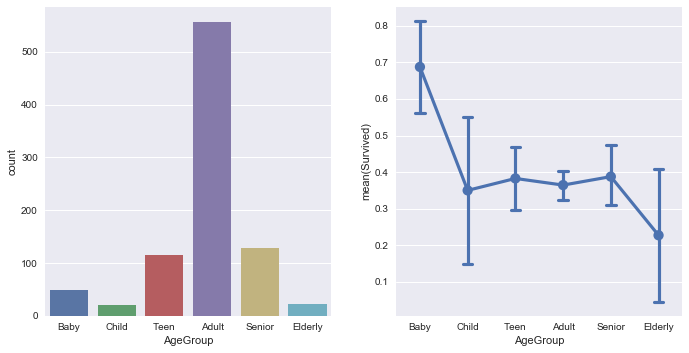

In [16]:
surv_rate_chart('AgeGroup')

Here, we can see that adults make up the majority of passengers, but **babies (ages 0-5) have by far the highest rate of survival, with a 68.75% chance.** Interestingly enough, it is closely followed by the Senior and Adolescent age groups (ages 40-60 and 10-20, respectively), which are ~38%. Adults (ages 20-40) are at 36.4%, and it is surprising that the Child age group (age 5-10) is lower at 35%. However, there is also a much smaller data size (20 total Children, compared to 48 Babies, not to mention older passengers in the hundreds).

The vertical bars show the standard deviations among each Age Group; it can be clearly seen that the Child group has a very large SD compared to others, despite having a lower mean than most. This indicates that the values are spread out much wider across both sides of the spectrum (i.e. lots of survivals and deaths in this age category).

### **Conclusion: Babies have the highest chance of survival, while the Elderly have the lowest chance.**

# `Name`
We have already used the `Names` variable when cleaning up the data to identify the titles of passengers in order to fill in missing `Age` entires. However, we can also see whether social status made an impact on survival.

In [17]:
surv_rate('Title')

,Title,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
16,the Countess,NaN,1.0,1,1.000000,NaN
9,Mlle,NaN,2.0,2,1.000000,0.000000
15,Sir,NaN,1.0,1,1.000000,NaN
13,Ms,NaN,1.0,1,1.000000,NaN
5,Lady,NaN,1.0,1,1.000000,NaN
10,Mme,NaN,1.0,1,1.000000,NaN
12,Mrs,26.0,99.0,125,0.792000,0.407510
8,Miss,55.0,127.0,182,0.697802,0.460477
7,Master,17.0,23.0,40,0.575000,0.500641
1,Col,1.0,1.0,2,0.500000,0.707107


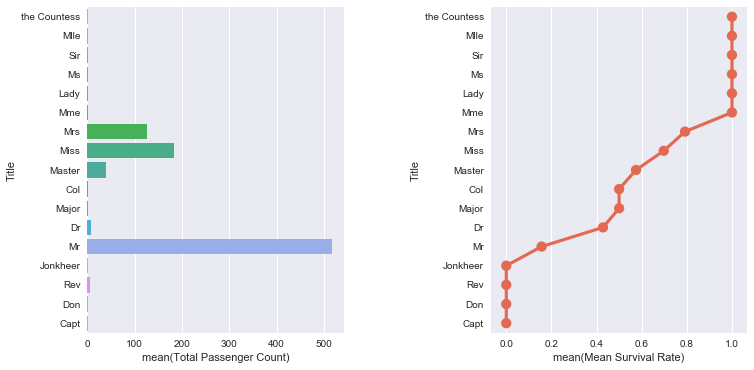

In [18]:
with sns.color_palette("coolwarm_r"):
    fig, ax = plt.subplots(1,2)
    plt.tight_layout(pad=0.4, w_pad=6, h_pad=1.0)
    sns.barplot(x="Total Passenger Count", y="Title", data=surv_rate('Title'), ax=ax[0]).figure.set_size_inches(10, 5)

    sns.pointplot(x="Mean Survival Rate", y="Title", data=surv_rate('Title'), ax=ax[1]).figure.set_size_inches(10, 5)

These plots do not quite definitively conclude that having a prestigious title helps a passenger survive.

The passengers titled Ms, Mrs, Miss, Master, and Mr are all fairly common titles, and are not considered a symbol of high social class. 'Mr' passengers had a very low 15.6% survival rate, 'Master' passengers had a much higher 57.5%, while 'Miss' and 'Mrs' passengers had 69.78% and 79.2%.

From the bottom of the list, you can see that the Jonkheer, the Reverends, the Don, and the Captain, despite having illustrious titles, still all perished. Doctors had a 42% survival rate, and Majors and Colonels both had a 50% survival rate.

On the other hand, the Countess, Sir, Lady, Madame, and 2 Madmoiselles all had a 100% chance of survival.

Thus, if we separate "commoners" from the "upper class", we can find the survival rate difference.

In [19]:
commoners = ['Mr', 'Mrs', 'Miss', 'Ms', 'Master']

print "Upper Class Survival Rate:", surv_rate('Title')[~surv_rate('Title')['Title'].isin(commoners)]['Mean Survival Rate'].mean()

print "Commoners Survival Rate:", surv_rate('Title')[surv_rate('Title')['Title'].isin(commoners)]['Mean Survival Rate'].mean()

Upper Class Survival Rate: 0.535714285714
Commoners Survival Rate: 0.644295062384


The survival rate of those with prestigious titles is actually **lower** than the survival rate of commoners! To be fair, it is also difficult to compare, since there were far greater numbers of commoners than upper class. 

However, this analysis based on titles also clearly reiterates a past conclusion: **titles belonging to female passengers had a much higher survival rate than titles belonging to male passengers**. The plot below illustrates this gender difference.

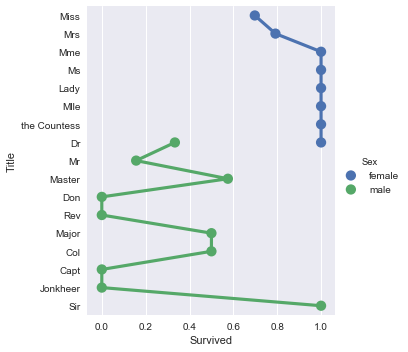

In [20]:
sns.factorplot(x="Survived", y="Title", hue="Sex", data=ti_data.sort_values(by=['Sex', 'Survived']), size=5, ci=None)

It is clear that there is still a strong gender division between those who survived and died. The various deaths of those from high society are all male, and those who survived are mostly women. Here, we can see that the only Title category with both males and females is Dr. And again, the female doctor has a 100% survival rate, while the male doctor only has a (now lower) survival rate of ~35%. 

Masters, as mentioned previously, referred to boys, and it has already been established that younger passengers have a higher rate of survival. It thus is unsurprising that Masters have the highest survival rate out of all male passengers (ignoring the sole surviving 'Sir' passenger). 

Delving even further, we can see that all females with prestigious titles (Mlle, Countess, Lady, Mme, and Dr) have a mean survival rate of 100%! Their male counterparts, on the other hand, have significantly lower rates (ignoring the one Sir).

### Conculsion: being female has a stronger correlation to survival than having a fancy title!

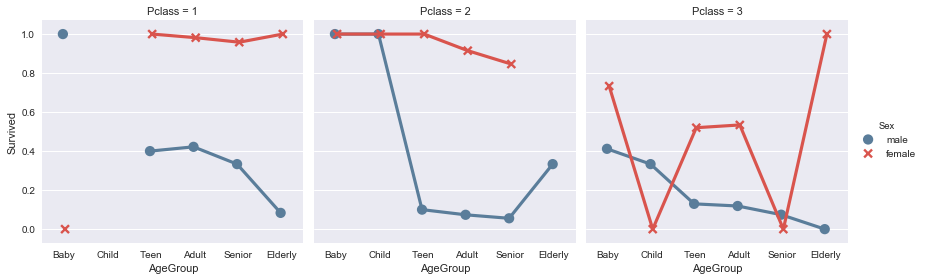

In [22]:
with sns.xkcd_palette(["steel blue", 'pale red', 'slate green']):
    sns.factorplot(y="Survived", x="AgeGroup", hue='Sex', col='Pclass', dodge=True,
                   data=ti_data, kind='point', size=4, ci=None, markers=["o", "x"])

One very clear difference here, is seeing the difference in survival between sexes in babies. In Class 1, male babies had a 100% survival rate, while female babies had a 0% survival rate. It is a little shocking, but it could be suggested that, out of desperation, male heirs received a higher preference over females from their parents. Of course, there are many other explanations for the difference here, but it is possible.

Otherwise, female children and adults in Clases 1 and 2 had very high survival rates. Female babies in Class 3 also had a high survival rate, while Class 3 children and Seniors unfortunately all perished. Adolescents and Adults had a 50/50 chance, while the Elderly managed to all survive!

Older males, on the other hand, drop off drastically, with Class 1 passengers having a survival rate of 40%, Class 2 and 3 passengers having a ~10% survival rate.

# `SibSp` & `Parch`

These two variables are **possibly relevant**, as passengers with family aboard may have been given priority over others.

In [23]:
surv_rate('SibSp')

,SibSp,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
1,1,97.0,112.0,209,0.535885,0.499908
2,2,15.0,13.0,28,0.464286,0.507875
0,0,398.0,210.0,608,0.345395,0.475888
3,3,12.0,4.0,16,0.250000,0.447214
4,4,15.0,3.0,18,0.166667,0.383482
5,5,5.0,NaN,5,0.000000,0.000000
6,8,7.0,NaN,7,0.000000,0.000000


In [24]:
surv_rate('Parch')

,Parch,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
3,3,2.0,3.0,5,0.600000,0.547723
1,1,53.0,65.0,118,0.550847,0.499529
2,2,40.0,40.0,80,0.500000,0.503155
0,0,445.0,233.0,678,0.343658,0.475279
5,5,4.0,1.0,5,0.200000,0.447214
4,4,4.0,NaN,4,0.000000,0.000000
6,6,1.0,NaN,1,0.000000,NaN


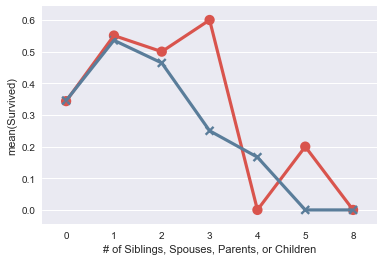

In [25]:
with sns.xkcd_palette(["pale red"]):
    sns.pointplot(x="Parch", y="Survived", data=ti_data, split=True, ci=None)
with sns.xkcd_palette(["steel blue"]):

    
    sns.pointplot(x="SibSp", y="Survived", data=ti_data, split=True, markers='x', ci=None).set(xlabel='# of Siblings, Spouses, Parents, or Children')

The `SibSp` variable is plotted with **blue crosses**, and `Parch` variables is plotted in **red dots**.

Interestingly, while the two variables would seem very similar, the data results are a little different. We must also hypothesize that there could be some overlap between the two indexes; families with spouses may also have children, or families with children may also have siblings, etc.

It appears that families with 3 parents/children aboard the Titanic have the highest rate of survival at 60%. However, this may also be an outlier, as the sample size was only 5 passengers.

In any case, one thing we can conclude for both `Parch` and `SibSp` is: 
- Passengers with either 1-2 siblings/spouses or parents/children have the **best chance of survival**.
- Passengers without any family whatsoever have a ~34.5% chance of survival, slightly lower than the 38% average.
- Passengers with many family members (4+) have **very low chances of survival**.

# `Ticket `

In [27]:
ti_data['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

The `Ticket` variable shows various unique numbers corresponding to what I would guess is where and at what class level it was purchased. Unfortunately, there are too many unique numbers here, with some prefixed letters used as well. Due to the overwhelming nature of this dataset, this variable is **not relevant**.

# `Fare`

The `Fare` variable shows how much each ticket was purchased for. We hypothesize that the more expensive fares were for higher passenger classes, and thus the more well-off passengers would have a higher rate of survival.

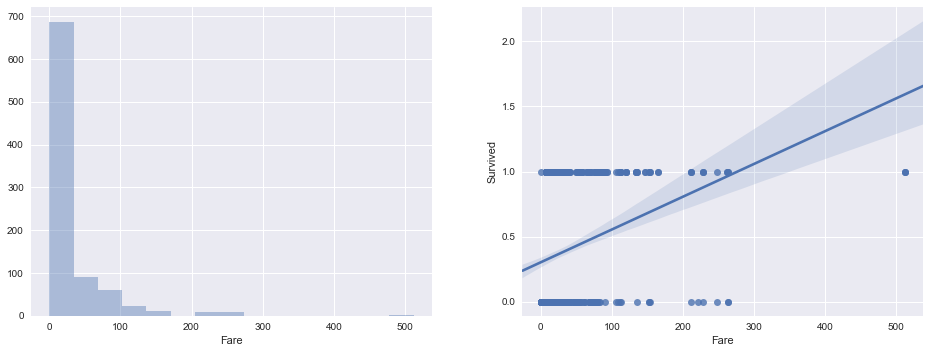

In [28]:
fig, ax = plt.subplots(1,2)
plt.tight_layout()
sns.distplot(a=ti_data['Fare'], kde=False, bins=15, ax=ax[0]).figure.set_size_inches(14, 5)
sns.regplot(x="Fare", y="Survived", data=ti_data, ax=ax[1]).figure.set_size_inches(14, 5)    

The histogram is strongly skewed to the right, showing that the majority of passengers paid no more than $50, let alone $100, for their tickets. The scatter plot also shows an upward regression line, representing a **strong positive correlation between survival rate and fare amount**.

Just like with our `Age` variable, there are multiple unique fare amounts paid by different passengers, but we can group them together into various dollar ranges in order to see cleaner patterns.

In [29]:
bins = [0, 25, 50, 100, 1000]
fare_amt = ['$0-$25', '$25-$50', '$50-$100', '$100+']

cut_fare = pd.cut(ti_data['Fare'], bins, labels=fare_amt)

#add binned age groups to df
ti_data['FareAmt'] = cut_fare

In [30]:
surv_rate('FareAmt')

,FareAmt,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
3,$100+,14,39,53,0.735849,0.445099
2,$50-$100,37,70,107,0.654206,0.477865
1,$25-$50,101,73,174,0.419540,0.494908
0,$0-$25,383,159,542,0.293358,0.455722


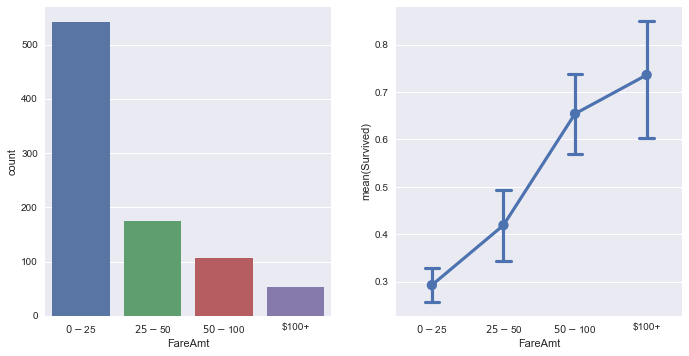

In [31]:
surv_rate_chart('FareAmt')

These charts, while more clear, reinforce what has already been established: a strong positive correlation between fare amounts and survival rate. 

### Conclusion: higher fare prices lead to a higher survival rate.

# `Embarked`

The `Embarked` variable shows where each passenger came aboard the Titanic from. My initial reaction was to consider this variable as **not relevant**.

In [32]:
ti_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In the above summary, we can also see that there are only 889 entries, which means two were missing. We identified the passengers with these missing vlaues.

In [33]:
# identify which indexes in Embarked have NaN values
ti_data[ti_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAgeMean,Title,NewAgeTitle,AgeGroup,FareAmt
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,Miss,38.0,Adult,$50-$100
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,Mrs,62.0,Elderly,$50-$100


Based on a Google search of their names (https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html), it is safe to say that Miss Icard and Mrs Stone embarked from Southhampton. The data points were subsequently updated.

In [34]:
ti_data['Embarked'].fillna('S', inplace=True)

assert ti_data['Embarked'].count()==891

In [35]:
surv_rate('Embarked')

,Embarked,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
0,C,75,93,168,0.553571,0.498608
1,Q,47,30,77,0.389610,0.490860
2,S,427,219,646,0.339009,0.473740


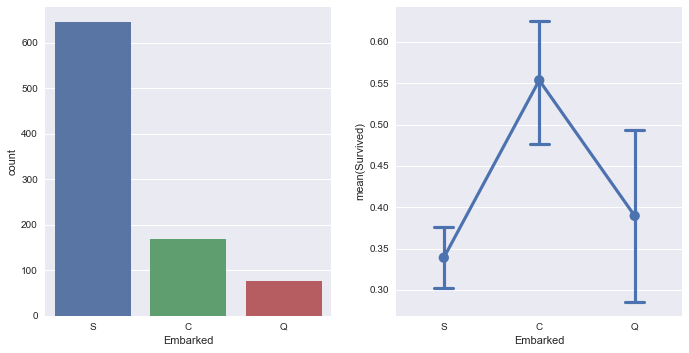

In [36]:
surv_rate_chart('Embarked')

It is clear that most passengers embarked from Southampton, and yet they also had the lowest survival rate. 

**Cherbourg had the highest survival rate, at 55.36%!**

It is interesting to see that there actually appears to be a different survival rate depending on where one had embarked from! However, it does not logically make sense that someone is more likely to die just because they embarked from Southampton as opposed to Queenstown.

We already know that males and poorer passengers have a lower survival rate; perhaps the `Sex`, `Pclass`, or `Fare` variables are linked to these points of embarkation?

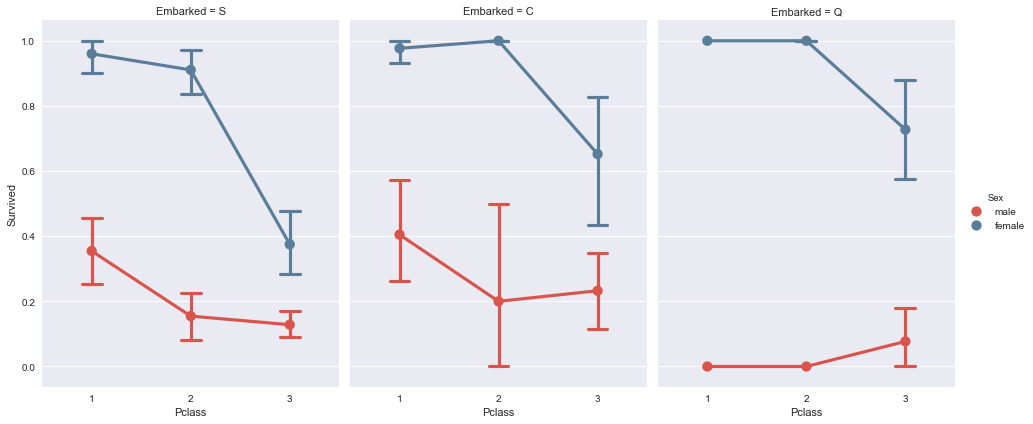

In [37]:
with sns.xkcd_palette(["pale red" ,"steel blue", "slate green"]):
    sns.factorplot(y="Survived", x="Pclass", hue="Sex", col="Embarked", 
                   data=ti_data, capsize=.2, size=6, aspect=.75)

Gropuping by `Pclass` and `Sex`, we can see that again, women have a drastically higher survival rate compared to men. Queenstown had the lowest survival for men, and but it also had the highest survival rate for women. However, we must also remember that Queenstown had a significantly smaller data pool, with only 77 passengers out of 891. Southampton had an overwhelming majority of passengers from 3rd class. From above analyses, we know that 3rd class passengers had a much lower survival rate. Interestingly enough, while Cherbourg had a more balanced mix of higher and lower class pasengers, almost all Queenstown-embarked passengers were also in 3rd class.

# `Cabin` 
The `Cabin` variable names the room the passenger stayed in.

In [38]:
ti_data['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

Here, we can see that there are 204 total passengers with cabins, and 147 unique cabin numbers. C23, C25, and C27 all show up 4 times, which must mean there are 4 passengers sharing each cabin (presumably family members).

But for the rest of the passengers? My guess is that they were too poor to afford cabins, in which case we should replace the `NaN` values with a simple "No Cabin".

In [39]:
ti_data['Cabin'].fillna('No Cabin', inplace=True)

assert ti_data['Cabin'].count()==891

However, almost all cabins still have unique names, which makes it difficult to make any assertions. First, we should explore the data to see if any patterns can be seen.

In [40]:
ti_data['Cabin'].unique()

array(['No Cabin', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',

The cabin numbers all appear to begin with a letter, followed by the number. This letter must be the deck where the cabin was located. We can divide the cabins by deck, and then find patterns on survival rate based on the cabin deck location.

In [41]:
# split Cabin level from number
def extract_decklvl(cabin):
    char = list(cabin)
    decklvl = (char[0])
    return decklvl
# append title to new column in dataframe
ti_data[['Cabin Deck']] = pd.DataFrame({'Cabin Deck':ti_data['Cabin'].apply(extract_decklvl)})

In [42]:
surv_rate('Cabin Deck')

,Cabin Deck,Perished,Survived,Total Passenger Count,Mean Survival Rate,Standard Deviation
3,D,8.0,25.0,33,0.757576,0.435194
4,E,8.0,24.0,32,0.750000,0.439941
1,B,12.0,35.0,47,0.744681,0.440755
5,F,5.0,8.0,13,0.615385,0.506370
2,C,24.0,35.0,59,0.593220,0.495450
6,G,2.0,2.0,4,0.500000,0.577350
0,A,8.0,7.0,15,0.466667,0.516398
7,N,481.0,206.0,687,0.299854,0.458528
8,T,1.0,NaN,1,0.000000,NaN


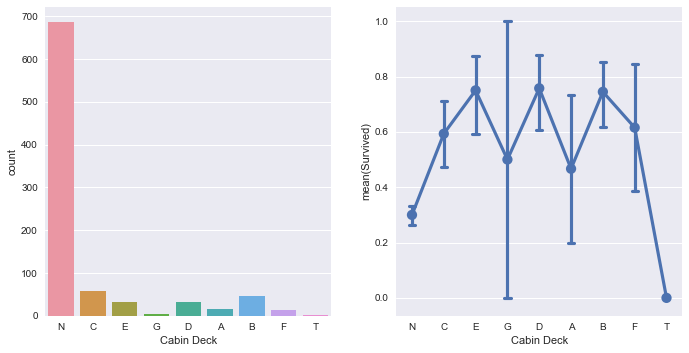

In [43]:
surv_rate_chart('Cabin Deck')

Here, we can see that the highest rate of survival belongs to passengers in cabins on Deck D, with a 75.75% chance of survival. Cabins E & B have similarly high rates of survival.

There was only one passenger in Cabin T, who unfortunately perished, and thus Cabin T has a 0% survival rate. However, since there was only one passenger, it may be prudent to remove this entry in order to not skew the overall mean too much.

In [44]:
cablist = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
no_n = surv_rate('Cabin Deck')[surv_rate('Cabin Deck')['Cabin Deck'].isin(cablist)]

print "Mean Survival Rate for Cabin Passengers (w/o Cabin T):", no_n['Mean Survival Rate'].mean()
print "Mean Survival Rate for Passengers w/o Cabin:", surv_rate('Cabin Deck')[surv_rate('Cabin Deck')['Cabin Deck']=='N']['Mean Survival Rate'].mean()

Mean Survival Rate for Cabin Passengers (w/o Cabin T): 0.632504032811
Mean Survival Rate for Passengers w/o Cabin: 0.299854439592


Without the 'N' and 'T' entries, passengers with a cabin had a 63% chance of survival, compared to 29.98% for those without a cabin.

### Conclusion: having a cabin definitely increased a passenger's chance of survival.

# Conclusion

Below is a quick summary showing all factors of passengers aboard the Titanic. These factors should definitely be kept in mind. 

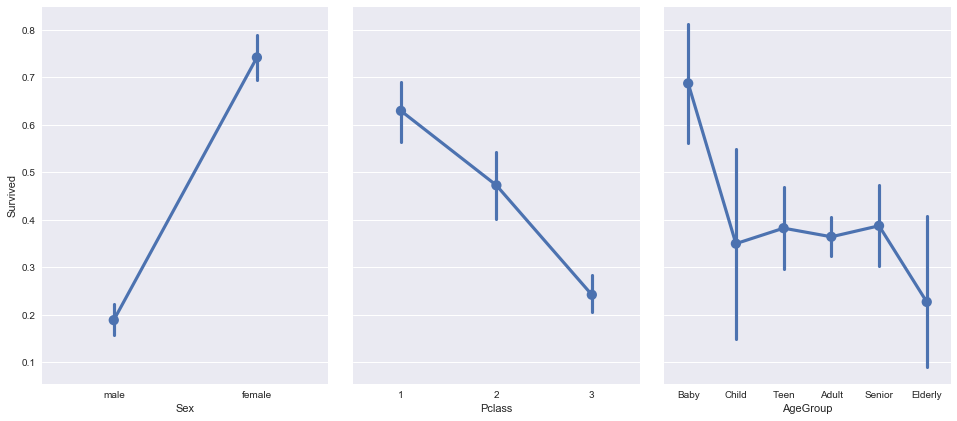

In [45]:
g = sns.PairGrid(ti_data,
                 x_vars=["Sex", "Pclass", "AgeGroup"],
                 y_vars=["Survived"],
                 aspect=.75, size=6)
g.map(sns.pointplot);

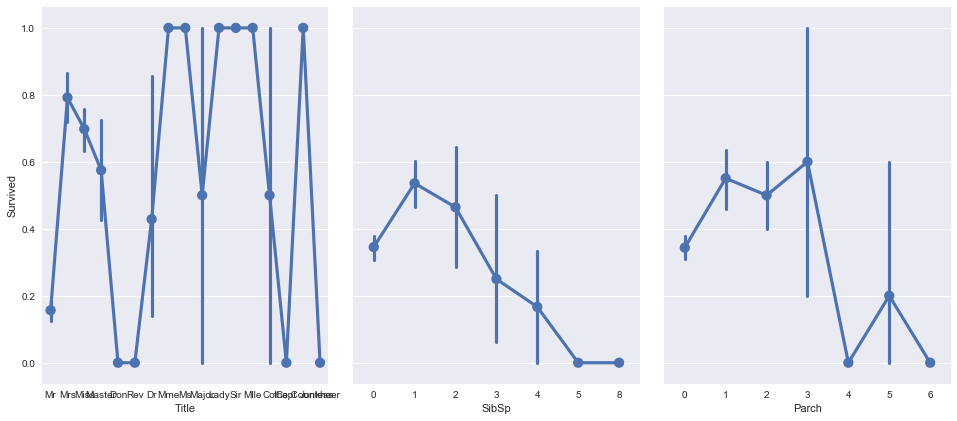

In [46]:
g = sns.PairGrid(ti_data,
                 x_vars=["Title", "SibSp", "Parch"],
                 y_vars=["Survived"],
                 aspect=.75, size=6)
g.map(sns.pointplot);

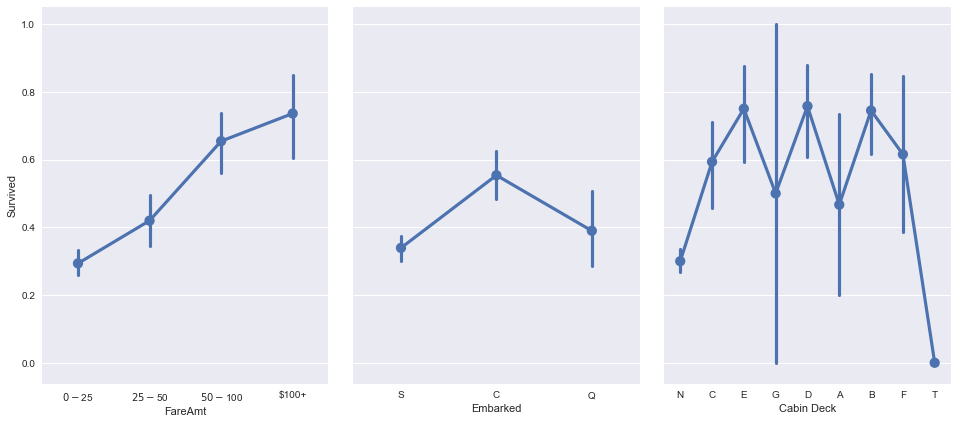

In [47]:
g = sns.PairGrid(ti_data,
                 x_vars=["FareAmt", "Embarked", "Cabin Deck"],
                 y_vars=["Survived"],
                 aspect=.75, size=6)


g.map(sns.pointplot);

What factors contributed to a passenger's survival? The answers lie in the following variables:
- being a young female with a prestigious title
- being from high society
- purchasing a high-priced ticket
- having a cabin
- embarking from Cherbourg
- having either one spouse or one sibling aboard the Titanic


It is logical to assume that a passenger with a prestigious title could have paid a lot for a ticket, and thus were in a high Passenger Class, and which also provided a cabin. All of these variables are linked to **Wealth**, one of the main defining factors of a passenger's survival. 

The second defining survival factor is **Gender**. No matter the situation, female passengers were afforded a **significantly** higher survival rate.

The final factor is **Age**. The extremely young had a much higher survival rate, while the extremely old had a much lower survival rate.

DAND Titanic Reference list
- https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
- https://chrisalbon.com/python/pandas_index_select_and_filter.html
- https://www.kaggle.com/c/titanic/data
- https://chrisalbon.com/python/pandas_create_column_using_conditional.html
- https://storage.googleapis.com/supplemental_media/udacityu/5428018709/numpy_pandas_cheatsheet.pdf
- https://discussions.udacity.com/t/contingency-table-in-python/296012
- https://stackoverflow.com/questions/17712163/pandas-sorting-columns-by-their-mean-value
- http://seaborn.pydata.org/tutorial/categorical.html
- https://discussions.udacity.com/t/doubt-relating-to-titanic-project/298115/6
- https://discussions.udacity.com/t/titanic-dataset-how-can-i-separate-the-column-name-into-surname-titel-forname/304566
- https://stackoverflow.com/questions/33925494/seaborn-produces-separate-figures-in-subplots
- https://stackoverflow.com/questions/33925494/seaborn-produces-separate-figures-in-subplots
- https://www.reddit.com/r/MachineLearning/comments/4bsqke/dealing_with_nan_in_dataset/
- https://matplotlib.org/users/tight_layout_guide.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html
- https://chrisalbon.com/python/pandas_missing_data.html